In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df1 = pd.read_csv('train_FD001.txt', sep=' ', header = None)
df2=pd.read_csv('train_FD002.txt', sep=' ', header = None)
df3=pd.read_csv('train_FD003.txt', sep=' ', header = None)
df4=pd.read_csv('train_FD004.txt', sep=' ', header = None)

In [3]:
df = pd.concat([df1,df2,df3,df4])

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,NaN,NaN
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,NaN,NaN
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,NaN,NaN
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,NaN,NaN


In [5]:
df=df.drop([26,27], axis='columns')

In [6]:
df.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
df

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774


In [7]:
df.columns

Index(['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1',
       'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5',
       'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9',
       'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12',
       'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15',
       'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18',
       'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160359 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               160359 non-null  int64  
 1   Cycle            160359 non-null  int64  
 2   OpSet1           160359 non-null  float64
 3   OpSet2           160359 non-null  float64
 4   OpSet3           160359 non-null  float64
 5   SensorMeasure1   160359 non-null  float64
 6   SensorMeasure2   160359 non-null  float64
 7   SensorMeasure3   160359 non-null  float64
 8   SensorMeasure4   160359 non-null  float64
 9   SensorMeasure5   160359 non-null  float64
 10  SensorMeasure6   160359 non-null  float64
 11  SensorMeasure7   160359 non-null  float64
 12  SensorMeasure8   160359 non-null  float64
 13  SensorMeasure9   160359 non-null  float64
 14  SensorMeasure10  160359 non-null  float64
 15  SensorMeasure11  160359 non-null  float64
 16  SensorMeasure12  160359 non-null  float

In [9]:
df.describe()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,105.553758,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,...,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,72.867325,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,...,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,...,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,44.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,...,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,89.000000,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,...,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,164.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,...,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,260.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


In [10]:
df.isnull().mean()

ID                 0.0
Cycle              0.0
OpSet1             0.0
OpSet2             0.0
OpSet3             0.0
SensorMeasure1     0.0
SensorMeasure2     0.0
SensorMeasure3     0.0
SensorMeasure4     0.0
SensorMeasure5     0.0
SensorMeasure6     0.0
SensorMeasure7     0.0
SensorMeasure8     0.0
SensorMeasure9     0.0
SensorMeasure10    0.0
SensorMeasure11    0.0
SensorMeasure12    0.0
SensorMeasure13    0.0
SensorMeasure14    0.0
SensorMeasure15    0.0
SensorMeasure16    0.0
SensorMeasure17    0.0
SensorMeasure18    0.0
SensorMeasure19    0.0
SensorMeasure20    0.0
SensorMeasure21    0.0
dtype: float64

<AxesSubplot:>

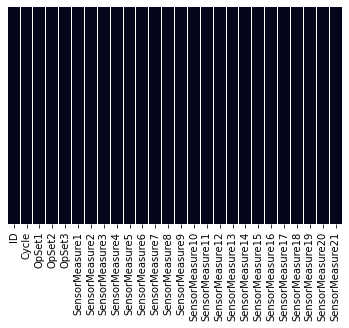

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [12]:
cor= df.corr().abs()
cor

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
ID,1.000000,0.012765,0.312532,0.333547,0.100764,0.323789,0.318260,0.307855,0.317691,0.332286,...,0.334766,0.100701,0.202467,0.253425,0.286560,0.308730,0.238296,0.100764,0.332439,0.332424
Cycle,0.012765,1.000000,0.009588,0.009960,0.000687,0.009526,0.012651,0.029766,0.036380,0.010034,...,0.013595,0.001481,0.098462,0.017034,0.043034,0.029852,0.005334,0.000687,0.010540,0.010593
OpSet1,0.312532,0.009588,1.000000,0.967487,0.163079,0.979797,0.925472,0.877521,0.909480,0.991539,...,0.971526,0.163065,0.459088,0.642981,0.901542,0.879403,0.619531,0.163079,0.977664,0.977674
OpSet2,0.333547,0.009960,0.967487,1.000000,0.197923,0.939207,0.898218,0.867189,0.912110,0.965691,...,0.958404,0.197861,0.527713,0.686817,0.932897,0.869323,0.623632,0.197923,0.959658,0.959656
OpSet3,0.100764,0.000687,0.163079,0.197923,1.000000,0.264989,0.493244,0.601374,0.539436,0.230742,...,0.366734,0.999998,0.904365,0.843670,0.359027,0.598086,0.870889,1.000000,0.344868,0.344814
SensorMeasure1,0.323789,0.009526,0.979797,0.939207,0.264989,1.000000,0.969407,0.926589,0.943456,0.992550,...,0.985205,0.264958,0.523178,0.698151,0.873423,0.928151,0.704665,0.264989,0.987856,0.987864
SensorMeasure2,0.318260,0.012651,0.925472,0.898218,0.493244,0.969407,1.000000,0.989141,0.988864,0.954472,...,0.982442,0.493222,0.702645,0.844254,0.879724,0.989728,0.857009,0.493244,0.979178,0.979172
SensorMeasure3,0.307855,0.029766,0.877521,0.867189,0.601374,0.926589,0.989141,1.000000,0.993401,0.911783,...,0.958803,0.601383,0.792588,0.907534,0.878761,0.998944,0.914698,0.601374,0.952101,0.952087
SensorMeasure4,0.317691,0.036380,0.909480,0.912110,0.539436,0.943456,0.988864,0.993401,1.000000,0.936864,...,0.975534,0.539443,0.764897,0.886103,0.912335,0.993885,0.877577,0.539436,0.969753,0.969742
SensorMeasure5,0.332286,0.010034,0.991539,0.965691,0.230742,0.992550,0.954472,0.911783,0.936864,1.000000,...,0.989408,0.230709,0.511161,0.689424,0.892455,0.913622,0.675427,0.230742,0.992562,0.992570


<AxesSubplot:>

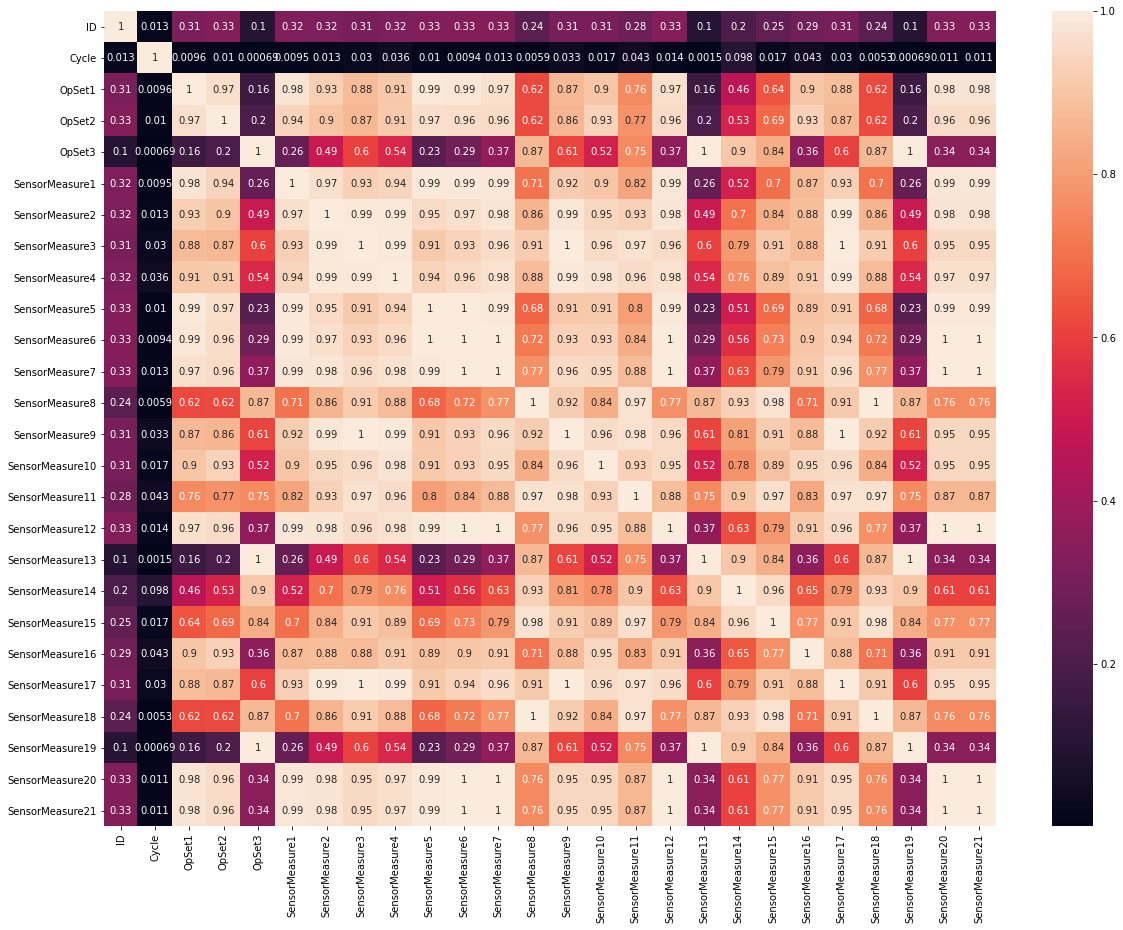

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)

In [14]:
df[df['ID'] == 1]

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1,317,0.0014,0.0014,100.0,518.67,643.45,1599.21,1416.74,14.62,...,534.10,2388.47,8184.95,8.2760,0.03,396,2388,100.0,39.58,23.6562
317,1,318,10.0046,0.2500,100.0,489.05,605.56,1509.31,1324.42,10.52,...,380.60,2388.74,8179.79,8.4656,0.03,374,2319,100.0,28.77,17.4422
318,1,319,10.0009,0.2520,100.0,489.05,605.29,1512.36,1317.11,10.52,...,380.60,2388.81,8177.70,8.4545,0.03,373,2319,100.0,28.87,17.4126
319,1,320,20.0060,0.7002,100.0,491.19,607.24,1496.88,1266.21,9.35,...,323.53,2388.87,8108.60,9.0019,0.03,368,2324,100.0,24.90,15.0215


In [15]:
df[df['ID'] == 2]

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.00,38.94,23.4585
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,522.70,2387.98,8131.09,8.4167,0.03,392,2388,100.00,39.06,23.4085
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,522.58,2387.99,8140.58,8.3802,0.03,391,2388,100.00,39.11,23.4250
195,2,4,0.0035,-0.0004,100.0,518.67,641.68,1584.15,1396.08,14.62,...,522.49,2387.93,8140.44,8.4018,0.03,391,2388,100.00,39.13,23.5027
196,2,5,0.0005,0.0004,100.0,518.67,641.73,1579.03,1402.52,14.62,...,522.27,2387.94,8136.67,8.3867,0.03,390,2388,100.00,39.18,23.4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2,295,19.9982,0.7002,100.0,491.19,608.60,1501.41,1263.71,9.35,...,313.79,2388.27,8067.36,9.3213,0.03,368,2324,100.00,24.25,14.6146
616,2,296,20.0078,0.7000,100.0,491.19,608.93,1495.42,1278.71,9.35,...,314.26,2388.35,8076.25,9.2883,0.03,368,2324,100.00,24.43,14.5192
617,2,297,24.9993,0.6205,60.0,462.54,537.21,1264.64,1070.69,7.05,...,163.82,2028.42,7885.78,11.0337,0.02,308,1915,84.93,14.09,8.5068
618,2,298,20.0008,0.7000,100.0,491.19,608.17,1499.21,1270.03,9.35,...,313.79,2388.37,8066.76,9.3526,0.03,368,2324,100.00,24.18,14.5013


<ipython-input-16-6fb8f0bda066>:10: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(True)


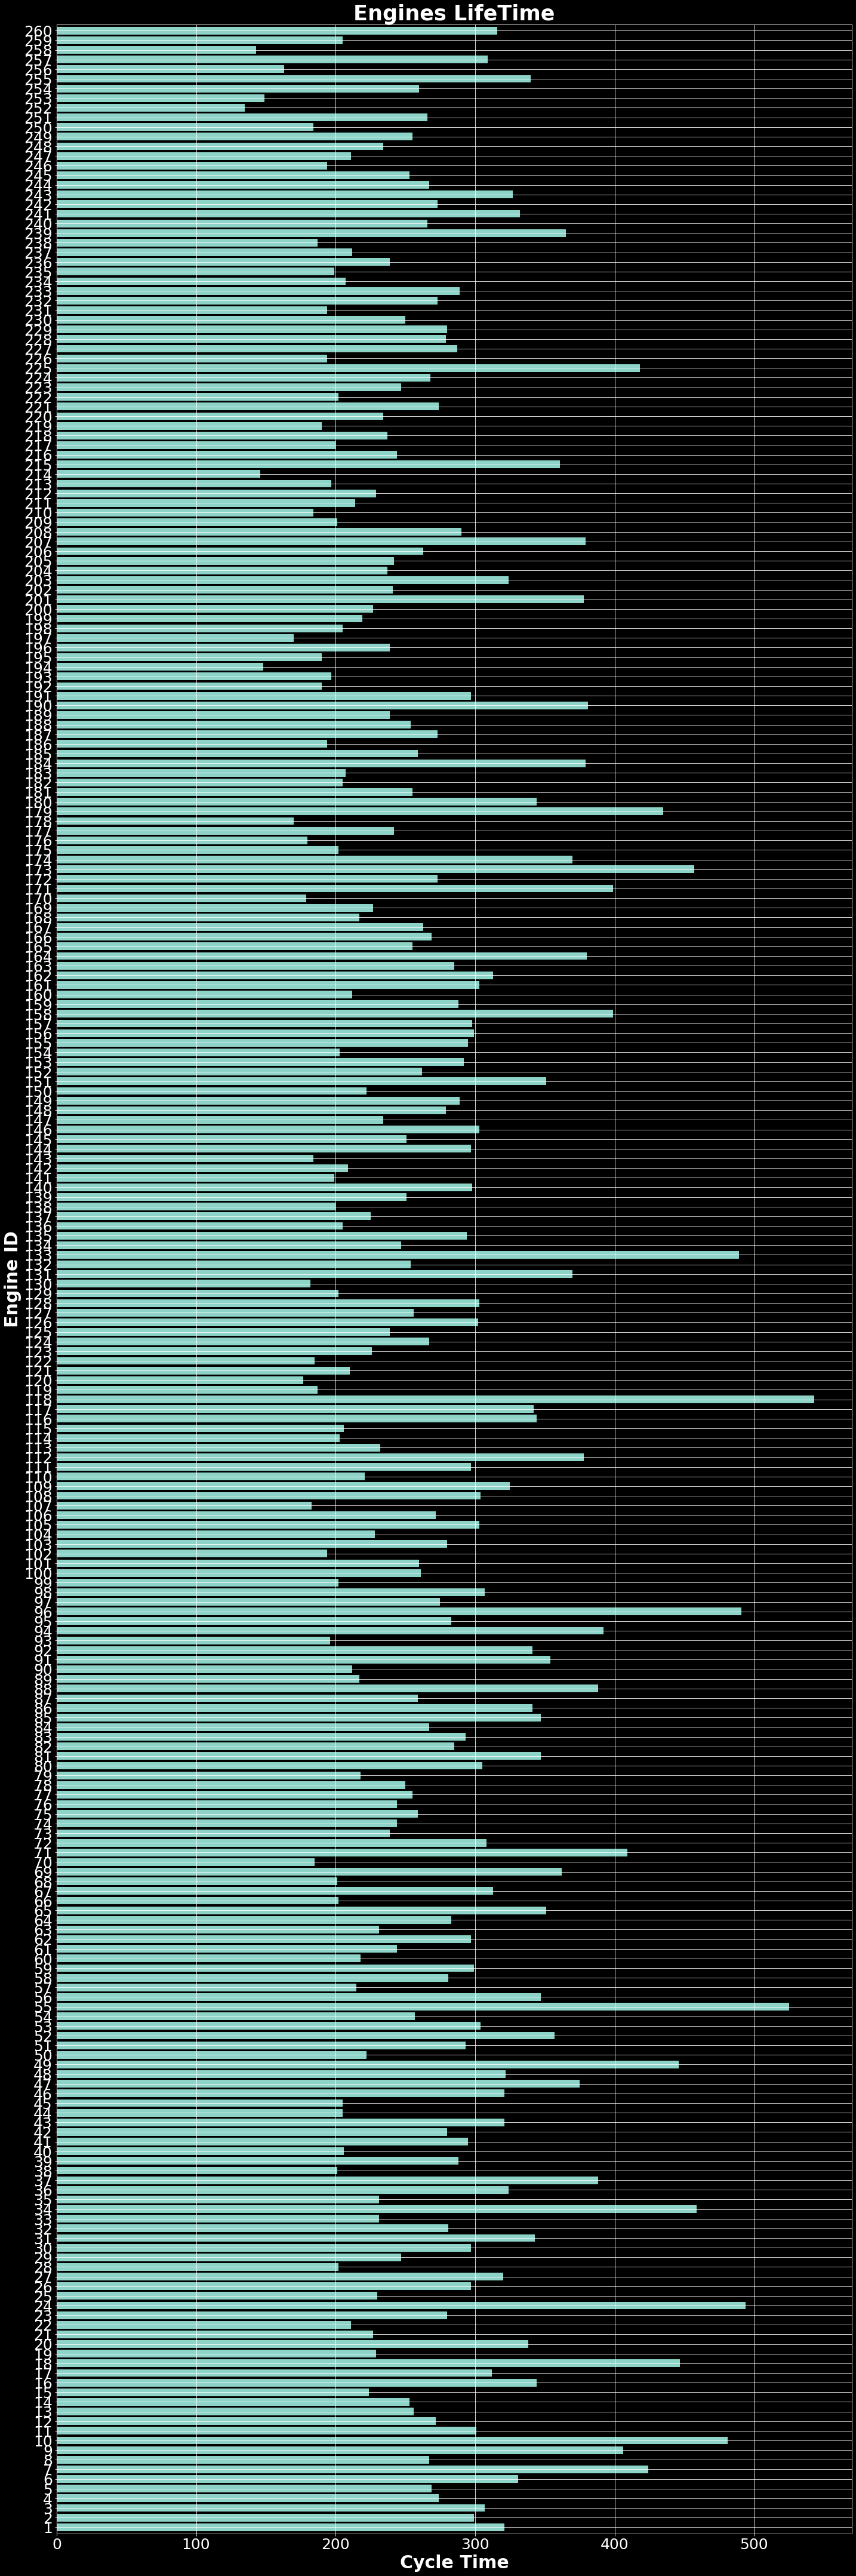

In [16]:
plt.style.use('dark_background')
plt.figure(figsize=(20,60))
ax=df.groupby('ID')['Cycle'].max().plot(kind='barh',width=0.8, stacked=True,align='center',rot=0)
plt.title('Engines LifeTime',fontweight='bold',size=35)
plt.xlabel('Cycle Time',fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout(True)
plt.show()


In [17]:
# Making an array which contains EOL of all the Ids
EOL=[]
for sl_no in df['ID']:
        EOL.append( ((df[df['ID'] == sl_no]["Cycle"]).values)[-1])

In [18]:
np.shape(EOL)

(160359,)

In [19]:
# Append the "EOL" column
df["EOL"]=EOL

In [20]:
df

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,321
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,321
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,321
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,321
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,255
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,255
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,255
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,255


In [21]:
# Calculate "LR"
df["LR"] = df["Cycle"].div(df["EOL"])

In [22]:
df

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL,LR
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,321,0.003115
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,321,0.006231
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,321,0.009346
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,321,0.012461
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,321,0.015576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,255,0.984314
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,255,0.988235
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,255,0.992157
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,255,0.996078


In [23]:
# Drop ID and EOL
df=df.drop(columns=['ID','EOL'])

In [24]:
labels=[]
for i in range (0,len(df)):
    if np.array(df["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(df["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
df["labels"]=labels
df=df.drop(columns=['LR'])   
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,...,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,2
61245,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,...,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,2
61246,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,...,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,2
61247,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,...,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,2


In [25]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)


In [27]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

0.8170990271888251

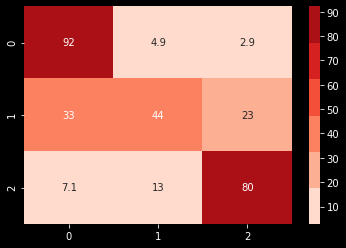

In [28]:
y_pred_RF = RF.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

In [29]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

0.9999930710974688

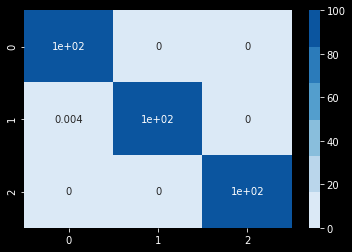

In [30]:
y_pred_RF = RF.predict(X_train)

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_train, y_pred_RF) 

In [31]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators=[200, 400, 300]
# Maximum number of levels in tree
max_depth= [10, 20, 30]
# Max number of samples given to each tree 
max_samples= [0.2,0.3,0.4 ]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_samples': max_samples}
print(random_grid)


{'n_estimators': [200, 400, 300], 'max_depth': [10, 20, 30], 'max_samples': [0.2, 0.3, 0.4]}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_samples': [0.2, 0.3, 0.4],
                                        'n_estimators': [200, 400, 300]})

In [33]:
rf_random.best_params_

{'n_estimators': 400, 'max_samples': 0.4, 'max_depth': 30}

In [34]:
rf_random.best_score_

0.816494950821126

In [35]:
raw_data = pd.read_csv('test_FD001.txt', sep=' ', header = None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [36]:
cycle_ran_after = pd.read_csv('RUL_FD001.txt', sep=' ', header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[112],
       [ 98],
       [ 69],
       [ 82],
       [ 91],
       [ 93],
       [ 91],
       [ 95],
       [111],
       [ 96],
       [ 97],
       [124],
       [ 95],
       [107],
       [ 83],
       [ 84],
       [ 50],
       [ 28],
       [ 87],
       [ 16],
       [ 57],
       [111],
       [113],
       [ 20],
       [145],
       [119],
       [ 66],
       [ 97],
       [ 90],
       [115],
       [  8],
       [ 48],
       [106],
       [  7],
       [ 11],
       [ 19],
       [ 21],
       [ 50],
       [142],
       [ 28],
       [ 18],
       [ 10],
       [ 59],
       [109],
       [114],
       [ 47],
       [135],
       [ 92],
       [ 21],
       [ 79],
       [114],
       [ 29],
       [ 26],
       [ 97],
       [137],
       [ 15],
       [103],
       [ 37],
       [114],
       [100],
       [ 21],
       [ 54],
       [ 72],
       [ 28],
       [128],
       [ 14],
       [ 77],
       [  8],
       [121],
       [ 94],
       [118],
      

In [37]:
given_no_of_cycles=[]
for i in range (1,len(raw_data['ID'].unique())+1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID']==i]))
    print(len(raw_data[raw_data['ID']==i]))
    
given_no_of_cycles=np.array(given_no_of_cycles).reshape([cycle_ran_after.shape[0],1]) 

31
49
126
106
98
105
160
166
55
192
83
217
195
46
76
113
165
133
135
184
148
39
130
186
48
76
140
158
171
143
196
145
50
203
198
126
121
125
37
133
123
156
172
54
152
146
73
78
303
74
144
189
164
121
113
136
160
176
94
147
159
232
155
168
71
147
71
187
54
152
68
131
112
137
88
205
162
72
101
133
213
162
73
172
34
110
56
68
177
146
234
150
244
133
89
97
134
121
97
198


In [38]:
len(raw_data['ID'].unique())

100

In [39]:
EOL=[]
i=0

for i in raw_data['ID']:
        EOL.append(given_no_of_cycles[i-1]+cycle_ran_after[i-1] ) 
        
EOL = np.array(EOL).reshape([len(EOL),1])  

In [40]:
EOL.shape

(13096, 1)

In [41]:
# Add the 'EOL' column to 'raw_data'
raw_data['EOL']=EOL
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,218
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,218
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,218
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,218


In [42]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
# Drop ID and EOL
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,LR
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0.006993
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0.013986
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0.020979
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0.027972
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0.034965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0.889908
13092,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0.894495
13093,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0.899083
13094,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0.903670


In [43]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])   
raw_data


,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,2
13092,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,2
13093,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,2
13094,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,2


In [44]:
raw_data = pd.read_csv('test_FD002.txt', sep=' ', header = None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [45]:
cycle_ran_after = pd.read_csv('RUL_FD002.txt', sep=' ', header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[ 18],
       [ 79],
       [106],
       [110],
       [ 15],
       [155],
       [  6],
       [ 90],
       [ 11],
       [ 79],
       [  6],
       [ 73],
       [ 30],
       [ 11],
       [ 37],
       [ 67],
       [ 68],
       [ 99],
       [ 22],
       [ 54],
       [ 97],
       [ 10],
       [142],
       [ 77],
       [ 88],
       [163],
       [126],
       [138],
       [ 83],
       [ 78],
       [ 75],
       [ 11],
       [ 53],
       [173],
       [ 63],
       [100],
       [151],
       [ 55],
       [ 48],
       [ 37],
       [ 44],
       [ 27],
       [ 18],
       [  6],
       [ 15],
       [112],
       [131],
       [ 13],
       [122],
       [ 13],
       [ 98],
       [ 53],
       [ 52],
       [106],
       [103],
       [152],
       [123],
       [ 26],
       [178],
       [ 73],
       [169],
       [ 39],
       [ 39],
       [ 14],
       [ 11],
       [121],
       [ 86],
       [ 56],
       [115],
       [ 17],
       [148],
      

In [46]:
given_no_of_cycles=[]
for i in range (1,len(raw_data['ID'].unique())+1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID']==i]))
    print(len(raw_data[raw_data['ID']==i]))
    
given_no_of_cycles=np.array(given_no_of_cycles).reshape([cycle_ran_after.shape[0],1]) 

258
55
165
86
148
63
184
173
161
84
162
74
164
160
165
88
264
40
172
101
128
159
49
210
147
76
68
23
101
184
123
170
135
52
77
163
49
127
149
183
210
137
184
164
195
132
81
132
65
164
37
165
149
74
123
73
76
247
22
144
70
205
174
233
367
63
146
218
158
264
65
143
151
103
192
222
67
128
113
278
76
96
21
204
183
83
131
166
59
163
278
123
76
117
78
140
213
113
163
149
38
122
186
141
61
72
132
174
144
219
131
109
45
153
210
171
55
97
202
160
59
29
61
149
79
99
126
110
218
141
73
122
186
186
120
77
226
200
116
306
69
163
226
143
142
144
78
157
70
196
141
90
146
58
72
75
161
171
187
124
174
185
144
199
35
97
78
107
80
85
243
128
117
51
83
200
191
54
156
154
199
134
150
64
254
166
84
86
178
158
95
161
245
50
262
109
59
120
117
60
25
124
115
41
31
162
141
166
131
182
155
187
159
75
71
100
49
33
161
54
55
180
29
43
166
165
180
44
109
125
187
159
40
147
102
274
235
94
106
50
44
194
40
49
265
80
87
162
36
234
64
249
139
131
150
59
199
98
123


In [47]:
len(raw_data['ID'].unique())

259

In [48]:
EOL=[]
i=0

for i in raw_data['ID']:
        EOL.append(given_no_of_cycles[i-1]+cycle_ran_after[i-1] ) 
        
EOL = np.array(EOL).reshape([len(EOL),1])  

In [49]:
EOL.shape

(33991, 1)

In [50]:
raw_data['EOL']=EOL
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,276
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,276
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,276
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,276
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,174
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,174
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,174
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,174


In [51]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
# Drop ID and EOL
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,LR
0,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,15.49,...,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,0.003623
1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,13.66,...,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,0.007246
2,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,8.00,...,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,0.010870
3,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,5.71,...,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,0.014493
4,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,9.03,...,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,0.018116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,8.00,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,0.683908
33987,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,5.72,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,0.689655
33988,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,5.72,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,0.695402
33989,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,21.61,...,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,0.701149


In [52]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])   
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,15.49,...,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,0
1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,13.66,...,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,0
2,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,8.00,...,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,0
3,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,5.71,...,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,0
4,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,9.03,...,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,8.00,...,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,1
33987,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,5.72,...,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,1
33988,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,5.72,...,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,1
33989,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,21.61,...,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,1


In [53]:
raw_data = pd.read_csv('test_FD003.txt', sep=' ', header = None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,529.23,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,529.27,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,529.48,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,529.39,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687


In [54]:
cycle_ran_after = pd.read_csv('RUL_FD003.txt', sep=' ', header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[ 44],
       [ 51],
       [ 27],
       [120],
       [101],
       [ 99],
       [ 71],
       [ 55],
       [ 55],
       [ 66],
       [ 77],
       [115],
       [115],
       [ 31],
       [108],
       [ 56],
       [136],
       [132],
       [ 85],
       [ 56],
       [ 18],
       [119],
       [ 78],
       [  9],
       [ 58],
       [ 11],
       [ 88],
       [144],
       [124],
       [ 89],
       [ 79],
       [ 55],
       [ 71],
       [ 65],
       [ 87],
       [137],
       [145],
       [ 22],
       [  8],
       [ 41],
       [131],
       [115],
       [128],
       [ 69],
       [111],
       [  7],
       [137],
       [ 55],
       [135],
       [ 11],
       [ 78],
       [120],
       [ 87],
       [ 87],
       [ 55],
       [ 93],
       [ 88],
       [ 40],
       [ 49],
       [128],
       [129],
       [ 58],
       [117],
       [ 28],
       [115],
       [ 87],
       [ 92],
       [103],
       [100],
       [ 63],
       [ 35],
      

In [55]:
given_no_of_cycles=[]
for i in range (1,len(raw_data['ID'].unique())+1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID']==i]))
    print(len(raw_data[raw_data['ID']==i]))
    
given_no_of_cycles=np.array(given_no_of_cycles).reshape([cycle_ran_after.shape[0],1]) 

233
124
234
68
138
64
158
192
238
131
103
146
65
169
112
126
230
244
115
207
263
119
405
475
169
130
104
70
89
333
152
120
180
105
144
90
47
133
310
313
101
87
133
146
88
180
56
179
211
147
118
38
108
50
203
162
158
119
149
112
78
224
137
271
79
122
186
188
105
84
367
232
109
68
191
180
381
279
170
85
155
194
168
76
118
174
218
41
120
206
56
266
158
333
213
358
95
182
289
247


In [56]:
len(raw_data['ID'].unique())

100

In [57]:
EOL=[]
i=0

for i in raw_data['ID']:
        EOL.append(given_no_of_cycles[i-1]+cycle_ran_after[i-1] ) 
        
EOL = np.array(EOL).reshape([len(EOL),1])  

In [58]:
EOL.shape

(16596, 1)

In [59]:
raw_data['EOL']=EOL
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,277
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,277
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,277
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,277
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949,275
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011,275
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,275
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,275


In [60]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
# Drop ID and EOL
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data


,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,LR
0,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,21.58,...,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,0.003610
1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,21.58,...,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,0.007220
2,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,21.58,...,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,0.010830
3,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,21.59,...,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,0.014440
4,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,21.58,...,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,0.018051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,21.58,...,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949,0.883636
16592,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,21.58,...,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011,0.887273
16593,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,21.58,...,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,0.890909
16594,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,21.58,...,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,0.894545


In [61]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])   
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,21.58,...,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,0
1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,21.58,...,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,0
2,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,21.58,...,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,0
3,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,21.59,...,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,0
4,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,21.58,...,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,21.58,...,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949,2
16592,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,21.58,...,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011,2
16593,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,21.58,...,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,2
16594,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,21.58,...,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,2


In [62]:
raw_data = pd.read_csv('test_FD004.txt', sep=' ', header = None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887


In [63]:
cycle_ran_after = pd.read_csv('RUL_FD004.txt', sep=' ', header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[ 22],
       [ 39],
       [107],
       [ 75],
       [149],
       [ 78],
       [ 94],
       [ 14],
       [ 99],
       [162],
       [143],
       [  7],
       [ 71],
       [105],
       [ 12],
       [160],
       [162],
       [104],
       [194],
       [ 82],
       [ 91],
       [ 11],
       [ 26],
       [142],
       [ 39],
       [ 92],
       [ 76],
       [124],
       [ 64],
       [118],
       [  6],
       [ 22],
       [147],
       [126],
       [ 36],
       [ 73],
       [ 89],
       [ 11],
       [151],
       [ 10],
       [ 97],
       [ 30],
       [ 42],
       [ 60],
       [ 85],
       [134],
       [ 34],
       [ 45],
       [ 24],
       [ 86],
       [119],
       [151],
       [142],
       [176],
       [157],
       [ 67],
       [ 97],
       [  8],
       [154],
       [139],
       [ 51],
       [ 33],
       [184],
       [ 46],
       [ 12],
       [133],
       [ 46],
       [ 46],
       [ 12],
       [ 33],
       [ 15],
      

In [64]:
given_no_of_cycles=[]
for i in range (1,len(raw_data['ID'].unique())+1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID']==i]))
    print(len(raw_data[raw_data['ID']==i]))
    
given_no_of_cycles=np.array(given_no_of_cycles).reshape([cycle_ran_after.shape[0],1]) 

230
153
141
208
51
146
54
248
284
23
82
270
227
102
168
240
334
247
24
115
202
158
162
174
486
90
144
20
216
229
134
260
107
361
278
159
345
125
214
266
414
200
120
406
78
37
224
214
273
206
137
58
67
81
103
180
121
185
37
135
396
240
158
251
186
97
150
241
162
190
292
118
149
223
203
48
108
106
184
112
60
146
274
88
174
254
167
140
285
118
144
116
200
105
110
123
51
82
237
196
166
443
145
65
351
148
121
145
66
348
342
88
132
218
82
161
97
178
228
170
194
117
236
230
21
220
98
139
315
107
193
115
74
266
435
56
291
239
88
160
19
69
327
34
102
84
116
126
320
202
285
195
130
122
161
28
138
171
160
122
257
99
122
29
178
63
99
74
34
48
355
132
151
135
116
185
146
279
262
367
199
98
125
154
203
47
121
157
107
200
71
203
263
214
186
70
196
115
177
115
139
222
87
19
95
291
179
180
171
135
206
261
288
102
72
264
141
63
110
65
176
178
305
152
39
59
62
126
20
157
230
370
111
179
362
176
221
177
28
204
42
112
199
184
63
29
94
281


In [65]:
len(raw_data['ID'].unique())

248

In [66]:
EOL=[]
i=0

for i in raw_data['ID']:
        EOL.append(given_no_of_cycles[i-1]+cycle_ran_after[i-1] ) 
        
EOL = np.array(EOL).reshape([len(EOL),1])  

In [67]:
EOL.shape

(41214, 1)

In [68]:
raw_data['EOL']=EOL
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,252
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,252
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,252
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,252
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,307
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,307
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,307
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,307


In [69]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
# Drop ID and EOL
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data


,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,LR
0,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,13.60,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,0.003968
1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,9.00,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,0.007937
2,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,5.69,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,0.011905
3,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,5.69,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,0.015873
4,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,7.97,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,0.019841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,5.72,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,0.902280
41210,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,13.66,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,0.905537
41211,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,8.00,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,0.908795
41212,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,13.66,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,0.912052


In [70]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])   
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,13.60,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,0
1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,9.00,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,0
2,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,5.69,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,0
3,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,5.69,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,0
4,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,7.97,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,5.72,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,2
41210,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,13.66,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,2
41211,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,8.00,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,2
41212,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,13.66,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,2
